In [1]:
# Import dependencies
import pandas as pd
import requests
from pymongo import MongoClient
import pymongo
from pprint import pprint
import csv
import json
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Read the Excel file into a pandas DataFrame
df = pd.read_excel('book1.xlsx')

# Display the DataFrame
print(df)


              Segment                   Country     Product   Discount Band   \
0          Government                    Canada   Carretera            None    
1          Government                   Germany   Carretera            None    
2           Midmarket                    France   Carretera            None    
3           Midmarket                   Germany   Carretera            None    
4           Midmarket                    Mexico   Carretera            None    
..                ...                       ...          ...             ...   
695    Small Business                    France    Amarilla            High    
696    Small Business                    Mexico    Amarilla            High    
697        Government                    Mexico     Montana            High    
698        Government                    Canada       Paseo            High    
699  Channel Partners  United States of America         VTT            High    

     Units Sold   Manufacturing Price  

In [3]:
# Check the data type of each column in the DataFrame
data_types = df.dtypes

# Print the data types
print(data_types)

Segment                          object
Country                          object
 Product                         object
 Discount Band                   object
Units Sold                      float64
 Manufacturing Price              int64
 Sale Price                       int64
 Gross Sales                    float64
 Discounts                      float64
  Sales                         float64
 COGS                           float64
 Profit                         float64
Date                     datetime64[ns]
Month Number                      int64
 Month Name                      object
Year                              int64
dtype: object


In [4]:
df.columns = df.columns.str.strip()

In [56]:
# Group by date and sum the metrics
table_5 = df.groupby('Country').agg({
    'Profit': 'sum'
}).reset_index()

# Sort the DataFrame by profit in descending order
table_5 = table_5.sort_values(by='Profit', ascending=False)
# Print the result
print(table_5)

                    Country      Profit
1                    France  3781020.79
2                   Germany  3680388.82
0                    Canada  3529228.89
4  United States of America  2995540.68
3                    Mexico  2907523.11


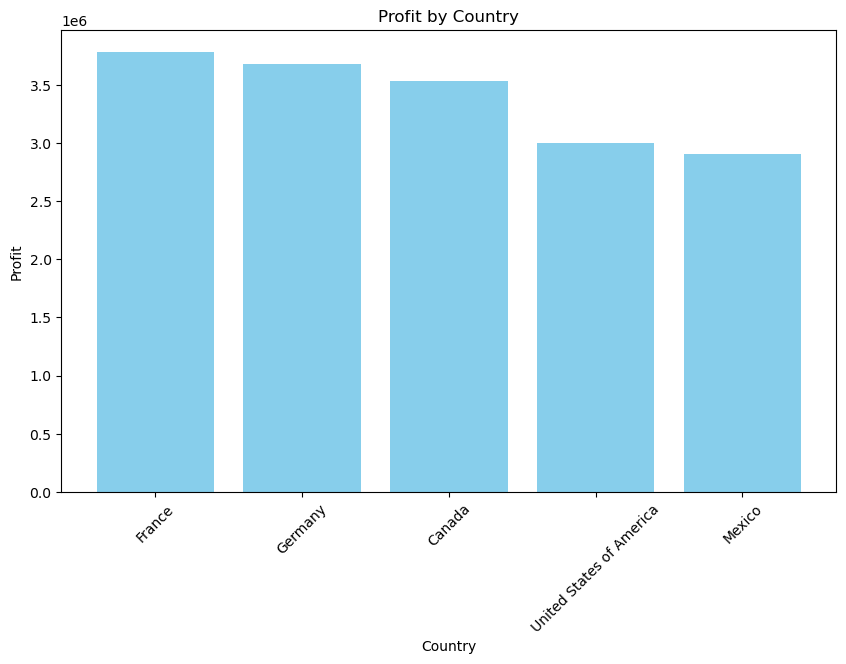

In [28]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(table_5['Country'], table_5['Profit'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Profit')
plt.title('Profit by Country')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Group by date and sum the metrics
table_4 = df.groupby('Product').agg({
    'Profit': 'sum'
}).reset_index()


# Print the result
print(table_4)

       Product      Profit
0    Amarilla   2814104.07
1   Carretera   1826804.89
2     Montana   2114754.88
3       Paseo   4797437.96
4         VTT   3034608.02
5        Velo   2305992.47


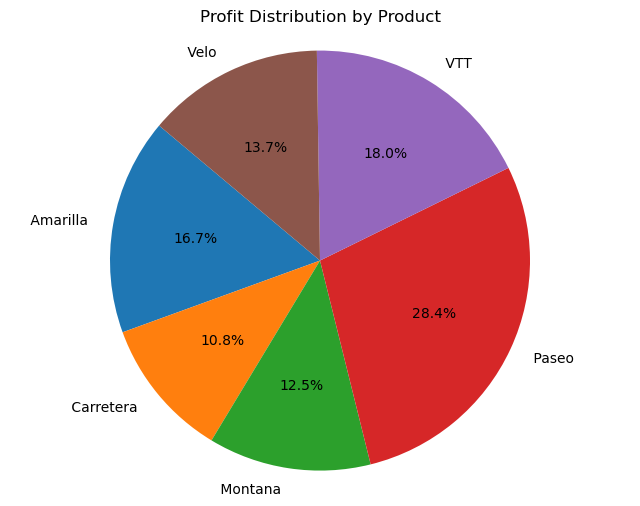

In [26]:
# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(table_4['Profit'], labels=table_4['Product'], autopct='%1.1f%%', startangle=140)
plt.title('Profit Distribution by Product')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [29]:
# Group by date and product, and sum the metrics
table_6 = df.groupby('Date').agg({
    'Units Sold': 'sum',
    'Profit': 'sum',
    'COGS': 'sum'
}).reset_index()

# Sort the DataFrame by date in ascending order
table_6 = table_6.sort_values(by='Date', ascending=True)

# Print the result
print(table_6)

         Date  Units Sold      Profit        COGS
0  2013-09-01     50601.0   763603.03   3720397.0
1  2013-10-01     95622.0  1657795.10   7637816.0
2  2013-11-01     65481.0   765502.30   6501701.0
3  2013-12-01     52970.0   691564.08   4676877.0
4  2014-01-01     67835.5   814028.69   5793733.0
5  2014-02-01     55115.0  1148547.39   6148984.0
6  2014-03-01     53420.0   669866.87   4916993.0
7  2014-04-01     78886.5   929984.58   6034790.5
8  2014-05-01     51771.0   828640.06   5381571.0
9  2014-06-01    103302.0  1473753.82   8045140.0
10 2014-07-01     69349.0   923865.69   7179054.5
11 2014-08-01     60705.0   791066.42   5073556.0
12 2014-09-01     57280.0  1023132.24   5375565.0
13 2014-10-01    105482.0  1781985.92  10593834.0
14 2014-11-01     55650.0   604600.20   4779614.0
15 2014-12-01    102336.0  2025765.90   9973022.0


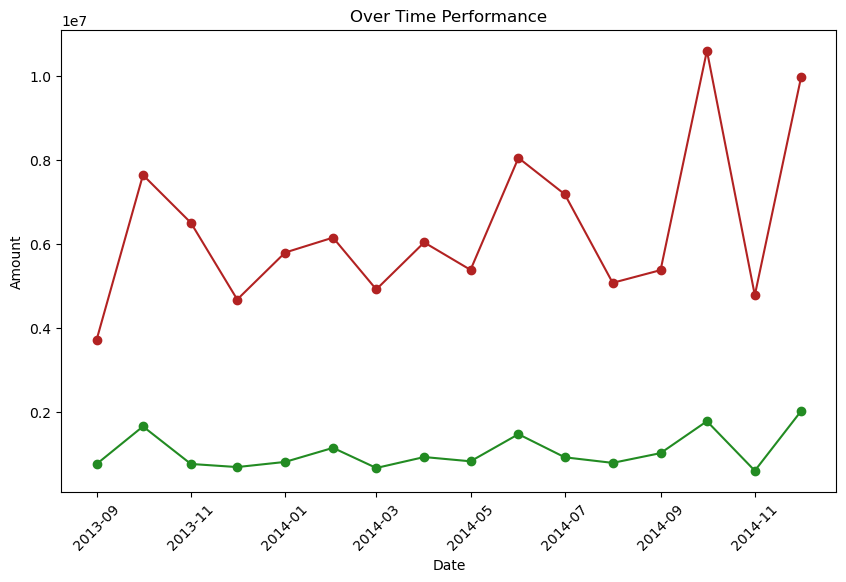

In [30]:
# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
# Overlay a line plot for profit
ax.plot(table_6['Date'], table_6['COGS'], marker='o', color='firebrick', label='COGS')
ax.plot(table_6['Date'], table_6['Profit'], marker='o', color='forestgreen', label='Profit')

# Set title and labels
ax.set_title('Over Time Performance')
ax.set_xlabel('Date')
ax.set_ylabel('Amount')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

In [39]:
# Group by date and product, and sum the metrics
table_7 = df.groupby(['Year', 'Product']).agg({
    'Units Sold': 'sum',
    'COGS': 'sum'
}).reset_index()

# Sort the DataFrame by date in ascending order
table_7 = table_7.sort_values(by='Year', ascending=True)

# Print the result
print(table_7)


    Year      Product  Units Sold        COGS
0   2013    Amarilla      33688.0   2737183.0
1   2013   Carretera      31404.0   1368097.0
2   2013     Montana      36280.0   3518025.0
3   2013       Paseo      82247.0   4814894.0
4   2013         VTT      41584.0   4523242.0
5   2013        Velo      39471.0   5575350.0
6   2014    Amarilla     121627.0  12195829.0
7   2014   Carretera     115442.0  10620406.0
8   2014     Montana     117918.0   9758022.0
9   2014       Paseo     255992.5  23398812.0
10  2014         VTT     127199.0  12954071.0
11  2014        Velo     122953.5  10368717.0


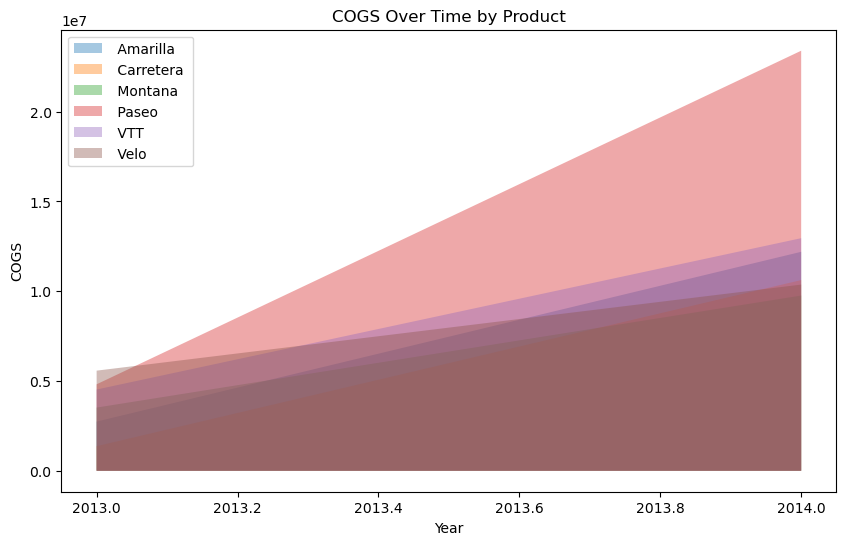

In [40]:
# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique product names
products = table_7['Product'].unique()

# Overlay area plots for each product
for product in products:
    product_data = table_7[table_7['Product'] == product]
    ax.fill_between(product_data['Year'], product_data['COGS'], label=product, alpha=0.4)

# Set title and labels
ax.set_title('COGS Over Time by Product')
ax.set_xlabel('Year')
ax.set_ylabel('COGS')

# Add legend with location set to 'upper left'
ax.legend(loc='upper left')


# Show plot
plt.show()


In [33]:
# Group by date and product, and sum the metrics
table_8 = df.groupby(['Year', 'Product']).agg({
    'Units Sold': 'sum',
    'Profit': 'sum'
}).reset_index()

# Sort the DataFrame by date in ascending order
table_8 = table_8.sort_values(by='Year', ascending=True)

# Print the result
print(table_8)


    Year      Product  Units Sold      Profit
0   2013    Amarilla      33688.0   781949.53
1   2013   Carretera      31404.0    38768.86
2   2013     Montana      36280.0   457758.04
3   2013       Paseo      82247.0  1099853.09
4   2013         VTT      41584.0   878185.23
5   2013        Velo      39471.0   621949.76
6   2014    Amarilla     121627.0  2032154.54
7   2014   Carretera     115442.0  1788036.03
8   2014     Montana     117918.0  1656996.84
9   2014       Paseo     255992.5  3697584.87
10  2014         VTT     127199.0  2156422.79
11  2014        Velo     122953.5  1684042.71


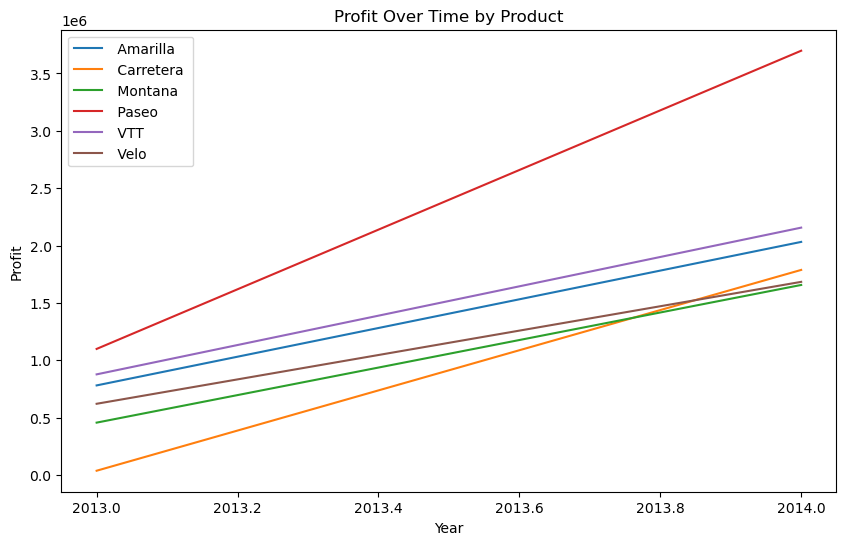

In [35]:
import matplotlib.pyplot as plt

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique product names
products = table_8['Product'].unique()

# Overlay line plots for each product
for product in products:
    product_data = table_8[table_8['Product'] == product]
    ax.plot(product_data['Year'], product_data['Profit'], label=product)

# Set title and labels
ax.set_title('Profit Over Time by Product')
ax.set_xlabel('Year')
ax.set_ylabel('Profit')

# Add legend with location set to 'upper left'
ax.legend(loc='upper left')

# Show plot
plt.show()


In [11]:
# Group by Country and sum the metrics
table_1 = df.groupby('Country').agg({
    'Sales': 'sum',
    'COGS': 'sum',
    'Discounts': 'sum',
    'Profit': 'sum'
}).reset_index()

# Print the result
print(table_1)

                    Country        Sales        COGS   Discounts      Profit
0                    Canada  24887654.89  21358426.0  2044508.62  3529228.89
1                    France  24354172.29  20573151.5  1727502.23  3781020.79
2                   Germany  23505340.82  19824952.0  1416126.68  3680388.82
3                    Mexico  20949352.11  18041829.0  1777582.89  2907523.11
4  United States of America  25029830.18  22034289.5  2239527.85  2995540.68


In [12]:

# Sort the DataFrame by profit in descending order
table_1 = table_1.sort_values(by='Profit', ascending=False)

# Format columns with commas and currency symbols
# table_1['Sales'] = table_1['Sales'].map('${:,.0f}'.format)
# table_1['COGS'] = table_1['COGS'].map('${:,.0f}'.format)
# table_1['Profit'] = table_1['Profit'].map('${:,.0f}'.format)
# table_1['Discounts'] = table_1['Discounts'].map('${:,.0f}'.format)

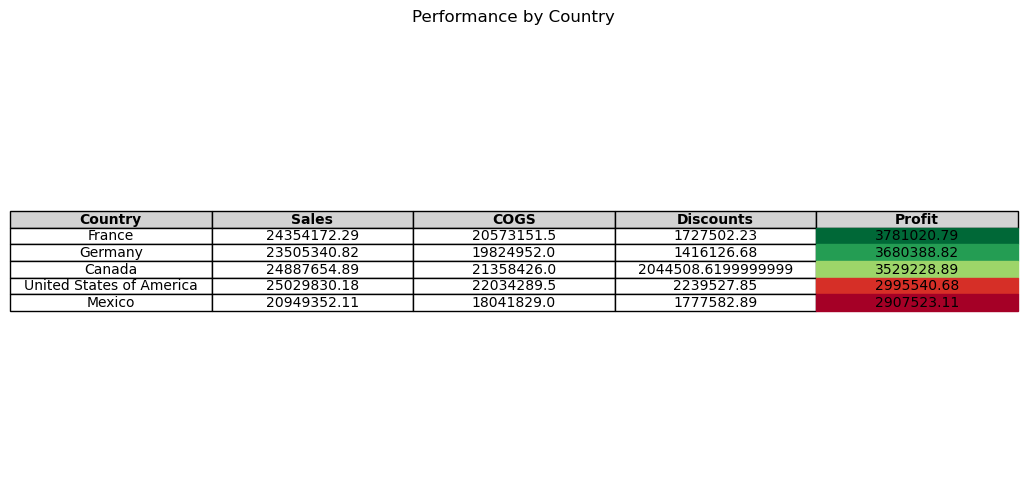

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
# Create a color gradient for the profit column
profits = table_1['Profit']
norm = plt.Normalize(profits.min(), profits.max())
colors = plt.cm.RdYlGn(norm(profits))


# Create a table visualization with colored profit column
fig, ax = plt.subplots(figsize=(13, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=table_1.values,
                 colLabels=table_1.columns,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
for (row, col), cell in table.get_celld().items():
    if col == 4 and cell.get_text().get_text() != 'Profit':  # Check if the cell is in the Profit column
        cell.set_color(colors[row - 1])  # Use row - 1 to account for header row
# Style column headers
for (i, label) in enumerate(table_1.columns):
    table[(0, i)].set_facecolor('lightgrey')  # Set background color of column headers
    table[(0, i)].get_text().set_weight('bold')  # Make text bold for column headers

plt.title('Performance by Country')
plt.show()

In [20]:
# Group by Product and sum the metrics
table_2 = df.groupby('Product').agg({
    'Sales': 'sum',
    'COGS': 'sum',
    'Discounts': 'sum',
    'Profit': 'sum'
}).reset_index()

# Sort the DataFrame by profit in descending order
table_2 = table_2.sort_values(by='Profit', ascending=False)
# Print the result
print(table_2)

       Product        Sales        COGS   Discounts      Profit
3       Paseo   33011143.96  28213706.0  2600518.06  4797437.96
4         VTT   20511921.02  17477313.0  1456612.48  3034608.02
0    Amarilla   17747116.07  14933012.0  1290163.45  2814104.07
5        Velo   18250059.47  15944067.0  1576709.04  2305992.47
2     Montana   15390801.88  13276047.0  1159032.62  2114754.88
1   Carretera   13815307.89  11988503.0  1122212.62  1826804.89


In [21]:

# Format columns with commas and currency symbols
# table_2['Sales'] = table_2['Sales'].map('${:,.0f}'.format)
# table_2['COGS'] = table_2['COGS'].map('${:,.0f}'.format)
# table_2['Profit'] = table_2['Profit'].map('${:,.0f}'.format)
# table_2['Discounts'] = table_2['Discounts'].map('${:,.0f}'.format)

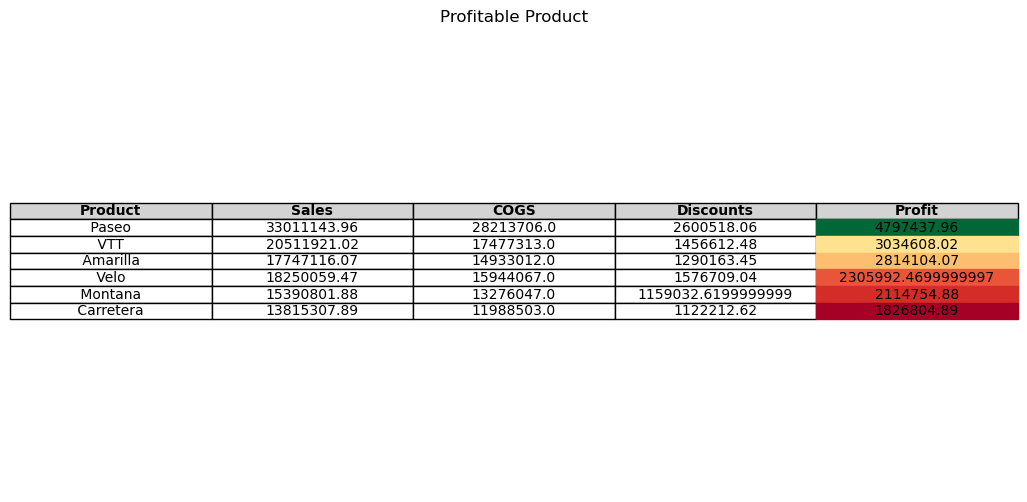

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'profits' is a column in your 'table_2' DataFrame
# Calculate the color gradient for the profit column
norm = plt.Normalize(table_2['Profit'].min(), table_2['Profit'].max())
colors = plt.cm.RdYlGn(norm(table_2['Profit']))

# Create a table visualization with colored profit column
fig, ax = plt.subplots(figsize=(13, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=table_2.values,
                 colLabels=table_2.columns,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)

# Apply gradient color to the Profit column
for (row, col), cell in table.get_celld().items():
    if col == 4 and cell.get_text().get_text() != 'Profit':  # Check if the cell is in the Profit column
        cell.set_color(colors[row - 1])  # Use row - 1 to account for header row

# Style column headers
for (i, label) in enumerate(table_2.columns):
    table[(0, i)].set_facecolor('lightgrey')  # Set background color of column headers
    table[(0, i)].get_text().set_weight('bold')  # Make text bold for column headers

plt.title('Profitable Product')
plt.show()


In [23]:
# Group by date and sum the metrics
table_3 = df.groupby('Date').agg({
    'COGS': 'sum',
    'Profit': 'sum'
}).reset_index()

# Sort the DataFrame by profit in descending order
table_3 = table_3.sort_values(by='Date', ascending=True)
# Print the result
print(table_3)

         Date        COGS      Profit
0  2013-09-01   3720397.0   763603.03
1  2013-10-01   7637816.0  1657795.10
2  2013-11-01   6501701.0   765502.30
3  2013-12-01   4676877.0   691564.08
4  2014-01-01   5793733.0   814028.69
5  2014-02-01   6148984.0  1148547.39
6  2014-03-01   4916993.0   669866.87
7  2014-04-01   6034790.5   929984.58
8  2014-05-01   5381571.0   828640.06
9  2014-06-01   8045140.0  1473753.82
10 2014-07-01   7179054.5   923865.69
11 2014-08-01   5073556.0   791066.42
12 2014-09-01   5375565.0  1023132.24
13 2014-10-01  10593834.0  1781985.92
14 2014-11-01   4779614.0   604600.20
15 2014-12-01   9973022.0  2025765.90


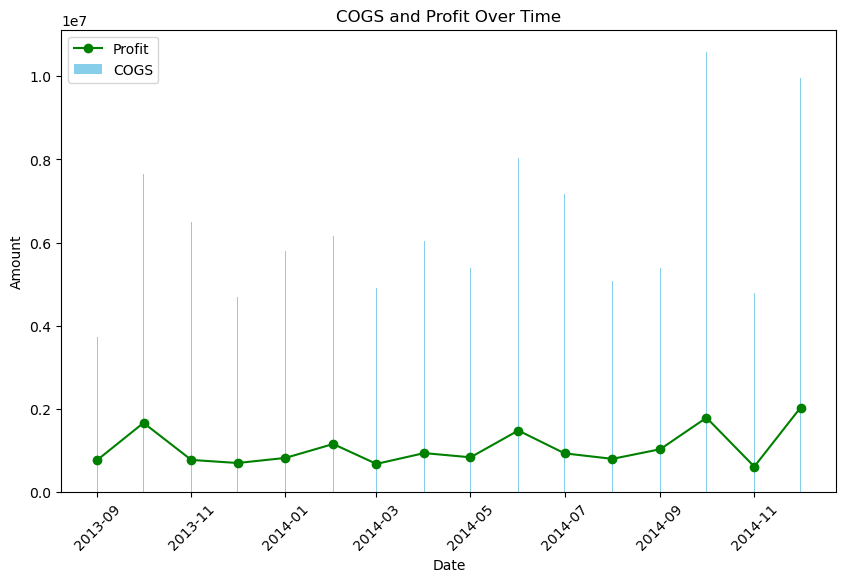

In [24]:

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot COGS as columns
ax.bar(table_3['Date'], table_3['COGS'], color='skyblue', label='COGS')

# Overlay a line plot for profit
ax.plot(table_3['Date'], table_3['Profit'], marker='o', color='green', label='Profit')

# Set title and labels
ax.set_title('COGS and Profit Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Amount')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

plt.show()

In [64]:
# Group by country and product and sum the profit
table_5_a = df.groupby(['Country', 'Product']).agg({
    'Units Sold': 'sum'
}).reset_index()

# Sort the DataFrame by country and profit in descending order
table_5_a = table_5_a.sort_values(by=['Country', 'Units Sold'], ascending=[False, False])

# Print the result
print(table_5_a)


                     Country      Product  Units Sold
27  United States of America       Paseo      69466.5
29  United States of America        Velo      35761.0
24  United States of America    Amarilla      35469.5
28  United States of America         VTT      34500.0
26  United States of America     Montana      31612.5
25  United States of America   Carretera      25818.0
21                    Mexico       Paseo      63282.0
20                    Mexico     Montana      31754.0
18                    Mexico    Amarilla      28396.0
19                    Mexico   Carretera      27224.0
23                    Mexico        Velo      26540.0
22                    Mexico         VTT      26129.0
15                   Germany       Paseo      55693.5
16                   Germany         VTT      31131.0
17                   Germany        Velo      31050.0
12                   Germany    Amarilla      30614.5
14                   Germany     Montana      28061.0
13                   Germany

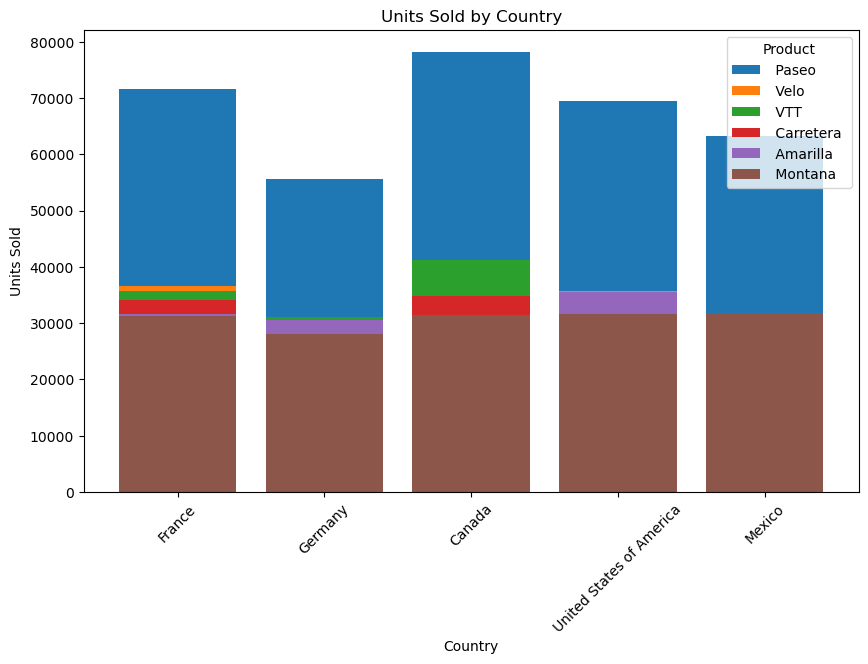

In [65]:

# Define the custom sorting order
custom_order = ['France', 'Germany', 'Canada', 'United States of America', 'Mexico']

# Group by country and product and sum the profit
table_5_a = df.groupby(['Country', 'Product']).agg({
    'Units Sold': 'sum'
}).reset_index()

# Sort the DataFrame by the custom order of countries and profit in descending order
table_5_a['Country'] = pd.Categorical(table_5_a['Country'], categories=custom_order, ordered=True)
table_5_a = table_5_a.sort_values(by=['Country', 'Units Sold'], ascending=[True, False])

# Plot the bar chart
plt.figure(figsize=(10, 6))
bottoms = {}
for product in table_5_a['Product'].unique():
    product_data = table_5_a[table_5_a['Product'] == product]
    plt.bar(product_data['Country'], product_data['Units Sold'], bottom=bottoms.get(product, 0), label=product)
    bottoms[product] = product_data['Units Sold']

plt.xlabel('Country')
plt.ylabel('Units Sold')
plt.title('Units Sold by Country')
plt.xticks(rotation=45)
plt.legend(title='Product')

plt.show()
